# Phone Dataset Classification Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Get data

In [2]:
phoneTrain = pd.read_csv('files/phone_train.csv')
phoneTrain.info() #2000 phones, 20 features and a target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
phoneTrain.head() # will need to scale some features

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
phoneTrain.describe() # no missing data, that's great

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [5]:
phoneTest = pd.read_csv('files/phone_test.csv')
phoneTest.info() # 1000 phones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [6]:
phoneTest.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [7]:
phoneTest.describe() # complete dataset, all good

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

## Some EDA

In [8]:
df = pd.concat([phoneTrain,phoneTest.drop('id',axis=1)],ignore_index=True)
df.describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean     1241.849000     0.502000     1.528467     0.512000     4.404000   
std       437.063804     0.500079     0.820358     0.499939     4.383742   
min       500.000000     0.000000     0.500000     0.000000     0.000000   
25%       863.750000     0.000000     0.700000     0.000000     1.000000   
50%      1232.000000     1.000000     1.500000     1.000000     3.000000   
75%      1619.000000     1.000000     2.300000     1.000000     7.000000   
max      1999.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000  ...   
mean      0.510000    32.581667     0.507000   140.003000     4.456333  ...   
std       0.499983    18.152810     0.285969    35.213809     2.289361  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     2.000000  ...   
50%       1.000000    33.000000     0.500000   140.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     6.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean    639.112333  1247.601667  2129.141333    12.202667     5.616667   
std     440.202998   434.666168  1085.694231     4.251151     4.322494   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     277.750000   865.000000  1212.750000     9.000000     2.000000   
50%     564.000000  1248.000000  2147.500000    12.000000     5.000000   
75%     932.500000  1634.000000  3065.250000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  3000.000000  3000.000000   3000.000000  3000.000000  2000.000000  
mean     11.035667     0.759667      0.502000     0.507000     1.500000  
std       5.474400     0.427357      0.500079     0.500034     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

<AxesSubplot:>

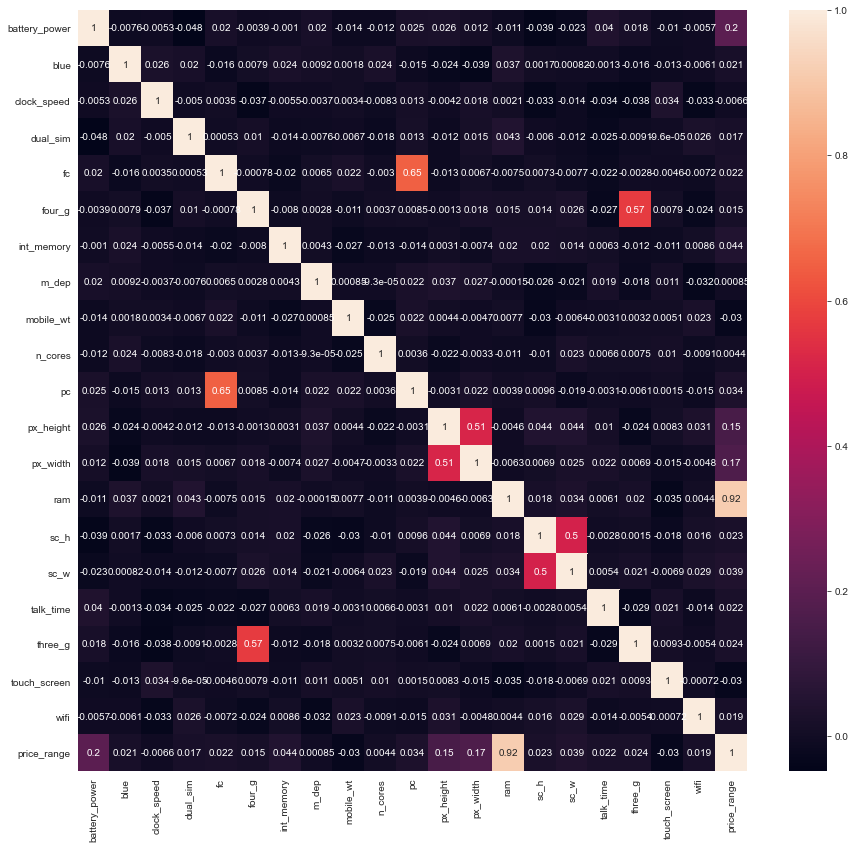

In [9]:
# battery power, phone size and ram most correlated with phone price
plt.figure(figsize=(15,14))
sns.heatmap(df.corr(),annot=True)

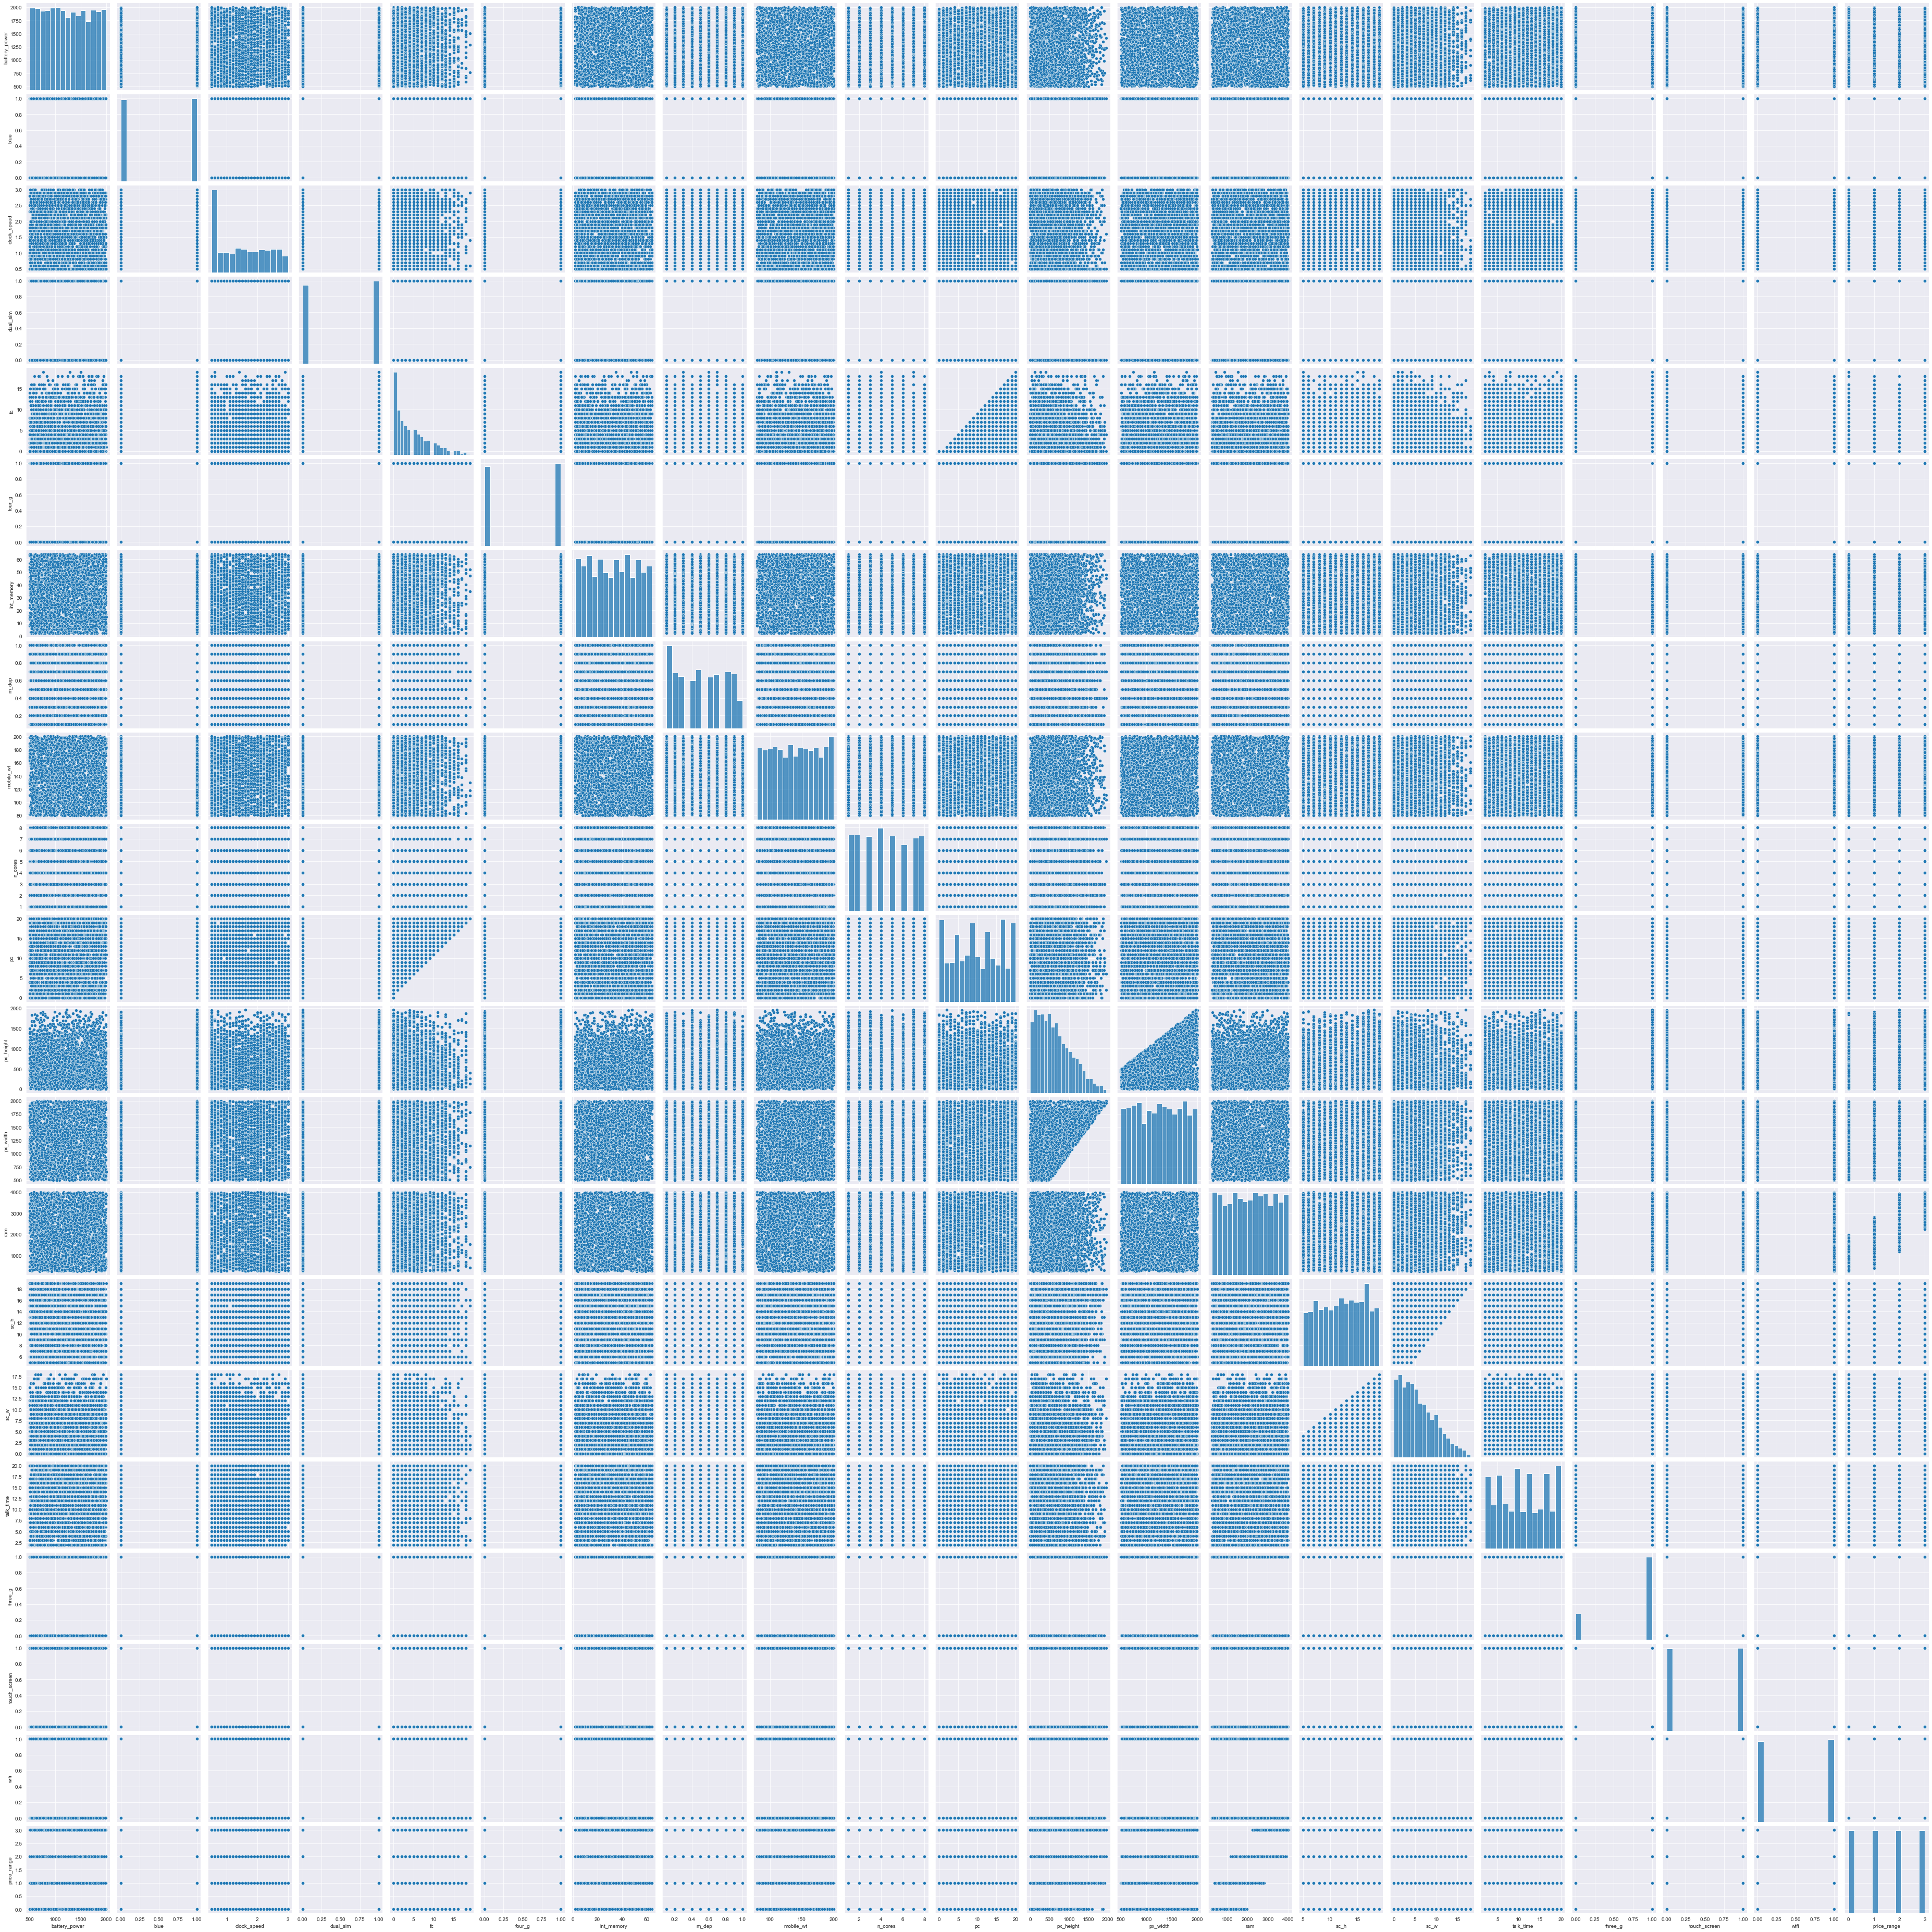

In [10]:
sns.pairplot(df)

## Data Prep

### Scale Features

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [12]:
scaledTrain = scale.fit_transform(phoneTrain.drop('price_range',axis=1))
scaledTrain = pd.DataFrame(scaledTrain,columns=phoneTrain.drop('price_range',axis=1).columns)
phoneTrain = pd.concat([scaledTrain, phoneTrain['price_range']],axis=1)
phoneTrain.head() # scaled features 

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores  ...  px_height  px_width  \
0   -1.380644  0.340740   1.349249 -1.101971  ...  -1.408949 -1.146784   
1    1.155024  0.687548  -0.120059 -0.664768  ...   0.585778  1.704465   
2    0.493546  1.381165   0.134244  0.209639  ...   1.392684  1.074968   
3   -1.215274  1.034357  -0.261339  0.646842  ...   1.286750  1.236971   
4    0.658915  0.340740   0.021220 -1.101971  ...   1.268718 -0.091452   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  \
0  0.391703 -0.784983  0.283103   1.462493 -1.786861     -1.006018  0.986097   
1  0.467317  1.114266 -0.635317  -0.734267  0.559641      0.994018 -1.014099   
2  0.441498 -0.310171 -0.864922  -0.368140  0.559641      0.994018 -1.014099   
3  0.594569  0.876859  0.512708  -0.002014  0.559641     -1.006018 -1.014099   
4 -0.657666 -1.022389 -0.864922   0.730240  0.559641      0.994018 -1.014099   

   price_range  
0            1  
1            2  
2            2  
3            2  
4            1  

[5 rows x 21 columns]

In [13]:
scaledTest = scale.fit_transform(phoneTest.drop(['id'],axis=1))
phoneTest = pd.DataFrame(scaledTest,columns=phoneTest.drop(['id'],axis=1).columns)
phoneTest.head() 

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.475451  0.968496     0.312601  0.966559  2.108676 -0.974329   
1      -0.942782  0.968496    -1.255832  0.966559 -0.132927  1.026347   
2       1.292077  0.968496     1.519087 -1.034598 -0.805408 -0.974329   
3       0.688249 -1.032529    -1.255832  0.966559  3.005317  1.026347   
4       0.429135 -1.032529    -0.169994 -1.034598  1.436195  1.026347   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.581269 -1.487247   1.535535 -0.580671  0.976026  -0.926990  0.391912   
1    1.509303  1.006341   1.478120  0.293833  0.319433   0.274729 -0.871028   
2   -0.367116  1.362567   1.334582 -0.580671 -0.993754   1.485693  0.287236   
3   -0.477493 -0.062340  -1.249091  1.605590  1.632619  -0.767532  1.165604   
4    0.847037 -0.062340  -0.904602  0.731085  1.304323   0.281662 -0.977979   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  1.229373  0.001158  0.397363  -1.653355 -1.760216           1.0 -1.014099  
1  1.614643 -1.388231 -1.254383  -0.743418  0.568112          -1.0 -1.014099  
2  0.236313  1.158982  1.105254  -0.197456 -1.760216           1.0  0.986097  
3  1.612804 -0.461972 -1.254383  -0.743418  0.568112           1.0 -1.014099  
4 -0.336535  0.695852  0.633326  -0.743418  0.568112          -1.0  0.986097

### Split into training and validation 

In [14]:
X_train_valid = phoneTrain.drop('price_range',axis=1)
y_train_valid = phoneTrain['price_range']
X_test = phoneTest

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

## Modelling 

### Logistic Regression

#### Build and train model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lrc = LogisticRegression(max_iter=1000)

In [19]:
lrc.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [20]:
pred = lrc.predict(X_valid)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

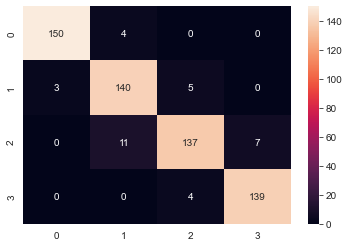

In [22]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [23]:
# 94% accuracy, precision, recall, and f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       154
           1       0.90      0.95      0.92       148
           2       0.94      0.88      0.91       155
           3       0.95      0.97      0.96       143

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knnc = KNeighborsClassifier()

In [88]:
knnc.fit(X_train,y_train)

KNeighborsClassifier()

In [89]:
pred = knnc.predict(X_valid)

<AxesSubplot:>

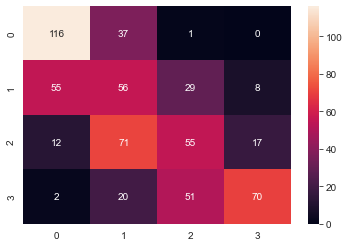

In [90]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [86]:
# 49% accuracy, 52% precision, 49% recall, 50% f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68       154
           1       0.30      0.38      0.34       148
           2       0.40      0.35      0.38       155
           3       0.74      0.49      0.59       143

    accuracy                           0.49       600
   macro avg       0.52      0.49      0.50       600
weighted avg       0.52      0.49      0.50       600



#### Choosing better K 

In [30]:
error_rate = []
for k in range(1,100):
    knnc = KNeighborsClassifier(n_neighbors=k)
    knnc.fit(X_train,y_train)
    pred = knnc.predict(X_valid)
    err = np.mean(y_valid != pred)
    error_rate.append(err)

In [31]:
import plotly.express as px 
px.line(x=range(1,100), y=error_rate, title='Error Rate vs. K value', labels={'x':'K','y':'Error Rate'})

In [91]:
knnc = KNeighborsClassifier(n_neighbors=79)
knnc.fit(X_train,y_train)
pred = knnc.predict(X_valid)

<AxesSubplot:>

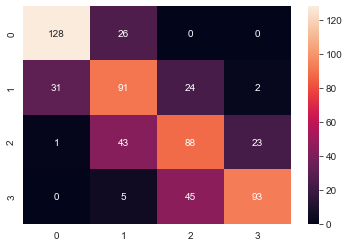

In [92]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [93]:
# 67% accuracy, 67% precision, 67% recall, 67% f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       154
           1       0.55      0.61      0.58       148
           2       0.56      0.57      0.56       155
           3       0.79      0.65      0.71       143

    accuracy                           0.67       600
   macro avg       0.68      0.67      0.67       600
weighted avg       0.67      0.67      0.67       600



### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtc = DecisionTreeClassifier()

In [37]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
pred = dtc.predict(X_valid)

<AxesSubplot:>

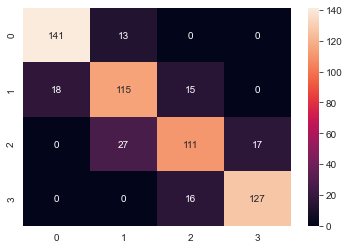

In [39]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [40]:
# 82% accuracy, 82% precision, 82% recall, 82% f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       154
           1       0.74      0.78      0.76       148
           2       0.78      0.72      0.75       155
           3       0.88      0.89      0.89       143

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators = 200)

In [43]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [44]:
pred = rfc.predict(X_valid)

<AxesSubplot:>

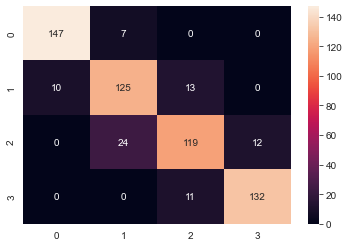

In [45]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [46]:
# 87% accuracy, 87% precision, 87% recall, 87% f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       154
           1       0.80      0.84      0.82       148
           2       0.83      0.77      0.80       155
           3       0.92      0.92      0.92       143

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



In [47]:
error_rate = []
for n in range(10,2000,100):
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train,y_train)
    pred = rfc.predict(X_valid)
    err = np.mean(y_valid != pred)
    error_rate.append(err)

In [48]:
# Not much improvement after 110 
import plotly.express as px 
px.line(x=range(10,2000,100), y=error_rate, title='Error Rate vs. n_estimators', labels={'x':'n','y':'Error Rate'})

In [49]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_valid)

<AxesSubplot:>

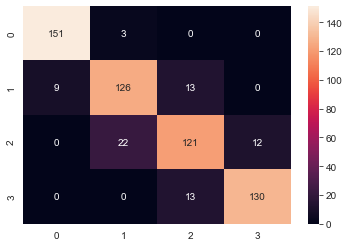

In [50]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [51]:
# 88% accuracy, 88% precision, 88% recall, 88% f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       154
           1       0.83      0.85      0.84       148
           2       0.82      0.78      0.80       155
           3       0.92      0.91      0.91       143

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



### Neural Network

In [52]:
from sklearn.neural_network import MLPClassifier

In [94]:
mlpc = MLPClassifier(200,max_iter=1000)

In [95]:
mlpc.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=200, max_iter=1000)

In [96]:
pred = mlpc.predict(X_valid)

<AxesSubplot:>

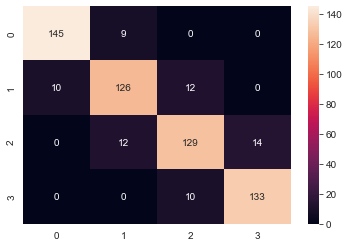

In [97]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [98]:
# 89% accuracy, 89% precision, 89% recall, 89% f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       154
           1       0.86      0.85      0.85       148
           2       0.85      0.83      0.84       155
           3       0.90      0.93      0.92       143

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [78]:
error_rate = []
for i in range(1,402,50):
    mlpc = MLPClassifier(i,max_iter=1000)
    mlpc.fit(X_train,y_train)
    pred = mlpc.predict(X_valid)
    err = np.mean(y_valid != pred)
    error_rate.append(err)

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [79]:
# Not much improvement after 110 
import plotly.express as px 
px.line(x=range(1,402,50), y=error_rate, title='Error Rate vs. n_estimators', labels={'x':'n','y':'Error Rate'})

In [81]:
error_rate = []
for i in range(1,152,20):
    mlpc = MLPClassifier((150,i))
    mlpc.fit(X_train,y_train)
    pred = mlpc.predict(X_valid)
    err = np.mean(y_valid != pred)
    error_rate.append(err)

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [61]:
# Not much improvement after 110 
import plotly.express as px 
px.line(x=range(1,602,50), y=error_rate, title='Error Rate vs. n_estimators', labels={'x':'n','y':'Error Rate'})

In [155]:
error_rate = []
for i in range(1,502,50):
    mlpc = MLPClassifier((150, 100,i))
    mlpc.fit(X_train,y_train)
    pred = mlpc.predict(X_valid)
    err = np.mean(y_valid != pred)
    error_rate.append(err)

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [156]:
import plotly.express as px 
px.line(x=range(1,502,50), y=error_rate, title='Error Rate vs. n_estimators', labels={'x':'n','y':'Error Rate'})

In [157]:
mlpc = MLPClassifier((150,100,250),max_iter=10000, alpha=1)

In [158]:
mlpc.fit(X_train,y_train)
pred = mlpc.predict(X_valid)

<AxesSubplot:>

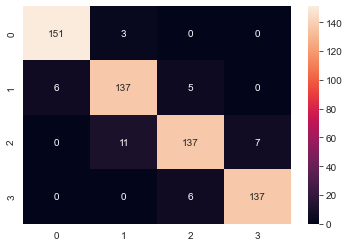

In [159]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [160]:
# 94% accuracy, 94% precision, 94% recall, 94% f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       154
           1       0.91      0.93      0.92       148
           2       0.93      0.88      0.90       155
           3       0.95      0.96      0.95       143

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [163]:
error_rate = []
for i in [0.001,0.005,0.01,0.05,0.1,0.3, 0.5, 1, 1.2, 2,3,5]:
    mlpc = MLPClassifier((150,100,250),alpha=i,max_iter=1000)
    mlpc.fit(X_train,y_train)
    pred = mlpc.predict(X_valid)
    err = np.mean(y_valid != pred)
    error_rate.append(err)

In [164]:
import plotly.express as px 
px.line(x=[0.001,0.005,0.01,0.05,0.1,0.3, 0.5, 1, 1.2, 2,3,5], y=error_rate, title='Error Rate vs. alpha', labels={'x':'n','y':'Error Rate'})

In [166]:
mlpc = MLPClassifier((150,100,250),alpha=5,max_iter=1000)
mlpc.fit(X_train,y_train)
pred = mlpc.predict(X_valid)

<AxesSubplot:>

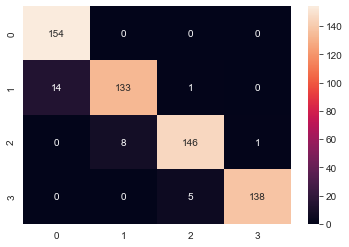

In [167]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [168]:
# 95% accuracy, 95% precision, 95% recall, 95% f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       154
           1       0.94      0.90      0.92       148
           2       0.96      0.94      0.95       155
           3       0.99      0.97      0.98       143

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [169]:
mlpc = MLPClassifier((150,100,250),learning_rate='adaptive', alpha=5,max_iter=1000)

In [170]:
mlpc.fit(X_train,y_train)

MLPClassifier(alpha=5, hidden_layer_sizes=(150, 100, 250),
              learning_rate='adaptive', max_iter=1000)

In [171]:
pred = mlpc.predict(X_valid)

<AxesSubplot:>

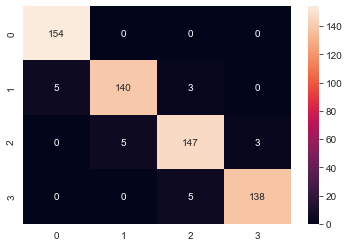

In [172]:
sns.heatmap(confusion_matrix(y_valid,pred),annot=True,fmt='g')

In [173]:
# 96% accuracy, 97% precision, 96% recall, 96% f1 score
print(classification_report(y_valid,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       154
           1       0.97      0.95      0.96       148
           2       0.95      0.95      0.95       155
           3       0.98      0.97      0.97       143

    accuracy                           0.96       600
   macro avg       0.97      0.96      0.96       600
weighted avg       0.97      0.96      0.96       600



## Deploy Model 

In [174]:
final_pred = mlpc.predict(X_test)

In [177]:
final_pred = pd.DataFrame(final_pred,columns=['price_range'])
final_pred.head()

price_range
0            3
1            3
2            2
3            3
4            1

In [178]:
final_pred.to_csv('files/phone_predictions.csv')